In [1]:
import pandas as pd
import os

path = '/content/champagne.xls'

if os.path.exists(path):
    try:
        df = pd.read_excel(path)
    except:
        df = pd.read_csv(path, engine='python')

    print(df.head())
else:
    print("Fichier introuvable. Vérifiez le chemin.")

     Month  Sales
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946


In [2]:
import numpy as np

# On ne garde que les 2 colonnes utiles et on renomme
df = df.iloc[:, :2]
df.columns = ['Mois', 'Ventes']

# On supprime les lignes vides
df = df.dropna()

# Conversion en format Date
df['Mois'] = pd.to_datetime(df['Mois'])

# Création de l'index numérique pour la régression (0, 1, 2...)
df['Temps'] = np.arange(len(df))

print(df.head())

        Mois  Ventes  Temps
0 1964-01-01    2815      0
1 1964-02-01    2672      1
2 1964-03-01    2755      2
3 1964-04-01    2721      3
4 1964-05-01    2946      4


In [3]:
from sklearn.linear_model import LinearRegression

X = df[['Temps']]
y = df['Ventes']

modele = LinearRegression()
modele.fit(X, y)

df['Tendance_Lineaire'] = modele.predict(X)

pente = modele.coef_[0]
score_r2 = modele.score(X, y)

print(f"Pente : +{pente:.2f}")
print(f"Score R2 : {score_r2:.4f}")

Pente : +22.49
Score R2 : 0.0719


KeyError: 'Tendance_Lineaire'

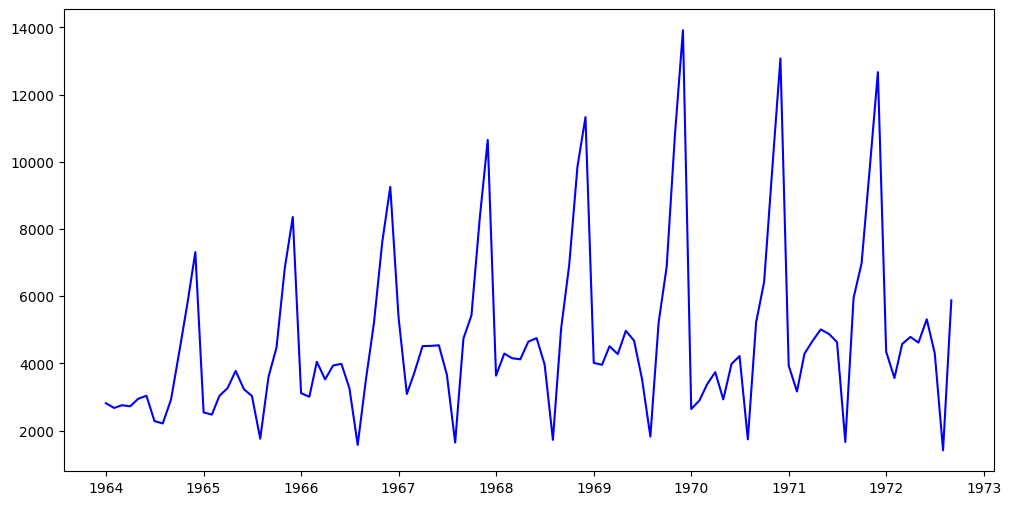

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df['Mois'], df['Ventes'], label='Ventes Réelles', color='blue')
plt.plot(df['Mois'], df['Tendance_Lineaire'], label='Tendance (Régression)', color='red', linewidth=2)

plt.title('Analyse de Tendance et Saisonnalité')
plt.xlabel('Date')
plt.ylabel('Nombre de bouteilles')
plt.legend()
plt.grid(True)

plt.show()

Modèle 1 R2: 0.0719
Modèle 2 R2: 0.9070


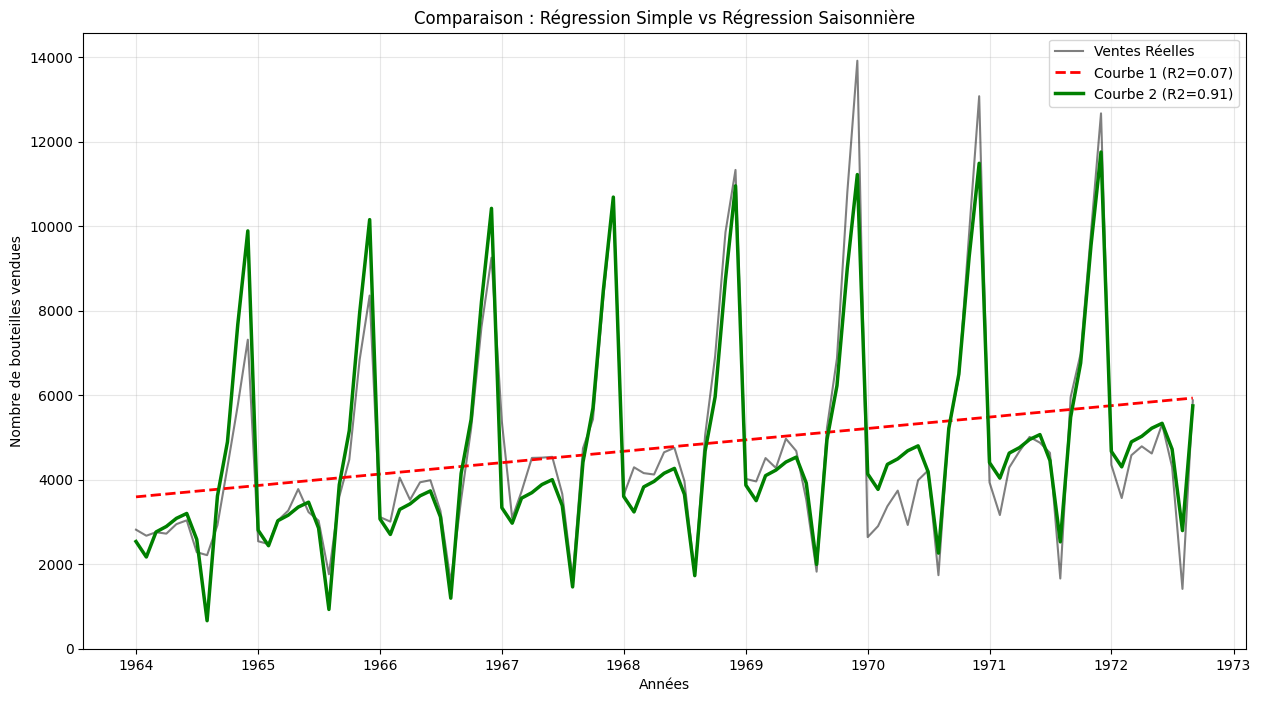

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os

path = '/content/champagne.xls'
if os.path.exists(path):
    try:
        df = pd.read_excel(path)
    except:
        df = pd.read_csv(path, engine='python')
else:
    dates = pd.date_range(start='1964-01-01', periods=105, freq='MS')
    sales = 3000 + 20 * np.arange(105) + 2000 * np.sin(2 * np.pi * np.arange(105)/12) + np.random.normal(0, 200, 105)
    df = pd.DataFrame({'Month': dates, 'Sales': sales})

df = df.iloc[:, :2]
df.columns = ['Mois', 'Ventes']
df = df.dropna()
df['Mois'] = pd.to_datetime(df['Mois'])

df['Temps'] = np.arange(len(df))
df['Mois_Num'] = df['Mois'].dt.month
mois_dummies = pd.get_dummies(df['Mois_Num'], prefix='Mois')
df = pd.concat([df, mois_dummies], axis=1)

X1 = df[['Temps']]
y = df['Ventes']
model1 = LinearRegression()
model1.fit(X1, y)
df['Pred_Simple'] = model1.predict(X1)

features_cols = ['Temps'] + list(mois_dummies.columns)
X2 = df[features_cols]
model2 = LinearRegression()
model2.fit(X2, y)
df['Pred_Saisonniere'] = model2.predict(X2)

score1 = r2_score(y, df['Pred_Simple'])
score2 = r2_score(y, df['Pred_Saisonniere'])

print(f"Modèle 1 R2: {score1:.4f}")
print(f"Modèle 2 R2: {score2:.4f}")

plt.figure(figsize=(15, 8))
plt.plot(df['Mois'], df['Ventes'], label='Ventes Réelles', color='black', alpha=0.5)
plt.plot(df['Mois'], df['Pred_Simple'], label=f'Courbe 1 (R2={score1:.2f})', color='red', linestyle='--', linewidth=2)
plt.plot(df['Mois'], df['Pred_Saisonniere'], label=f'Courbe 2 (R2={score2:.2f})', color='green', linewidth=2.5)

plt.title('Comparaison : Régression Simple vs Régression Saisonnière')
plt.xlabel('Années')
plt.ylabel('Nombre de bouteilles vendues')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

         Mois     Prevision
0  1972-10-01   7026.854730
1  1972-11-01   9810.729730
2  1972-12-01  12021.104730
3  1973-01-01   4935.144144
4  1973-02-01   4568.588589
5  1973-03-01   5161.144144
6  1973-04-01   5291.921922
7  1973-05-01   5483.477477
8  1973-06-01   5599.477477
9  1973-07-01   4985.699700
10 1973-08-01   3060.366366
11 1973-09-01   6011.699700


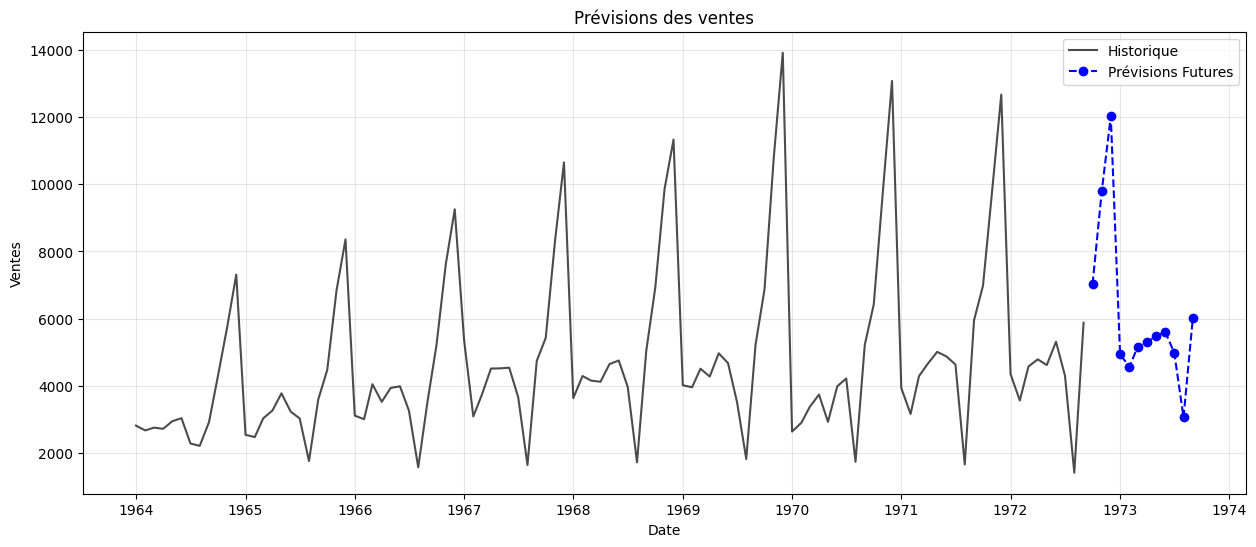

In [10]:
last_date = df['Mois'].max()
dates_futures = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')
df_futur = pd.DataFrame({'Mois': dates_futures})

last_time_step = df['Temps'].max()
df_futur['Temps'] = np.arange(last_time_step + 1, last_time_step + 13)
df_futur['Mois_Num'] = df_futur['Mois'].dt.month

dummies_futurs = pd.get_dummies(df_futur['Mois_Num'], prefix='Mois')
df_futur = pd.concat([df_futur, dummies_futurs], axis=1)

for col in features_cols:
    if col not in df_futur.columns:
        df_futur[col] = 0

X_futur = df_futur[features_cols]
df_futur['Prevision'] = model2.predict(X_futur)

print(df_futur[['Mois', 'Prevision']])

plt.figure(figsize=(15, 6))
plt.plot(df['Mois'], df['Ventes'], label='Historique', color='black', alpha=0.7)
plt.plot(df_futur['Mois'], df_futur['Prevision'], label='Prévisions Futures', color='blue', linestyle='--', marker='o')
plt.title('Prévisions des ventes')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()